# TP3 : Estimation de densité
Dans ce TP, nous utiliserons le langage Python. Il y’a plusieurs manières de l’utiliser, premièrement, il faut une partie d’écriture de programmes (au format .py) qui peut seulement être faite avec n’importe quel éditeur de texte, il y’a ensuite un logiciel de compilation des programmes Python, vous pouvez utiliser celui de votre choix. Chaque graphique demandé dans ce TP sera à enregistrer au format Pi-NOM1NOM2Qj.png où i est le numéro de la partie en question, j est le numéro de la question au sein de la partie considérée et NOM1 et NOM2 sont les deux noms de famille des deux membres du binôme de TP. Chaque question comportant le symbole **⋆** nécessitera la création d’un graphique à enregistrer comme spécifié ci-dessus. S’il y’a plusieurs graphiques à faire pour une seule question, ils seront nommés PiNOM1NOM2Qja.png, PiNOM1NOM2Qjb.png etc...

## Travail en séance Python : Partie 1

Le but de cette partie est de définir, représenter et comparer l’efficacité des quatre noyaux de la préparation pour l’estimation de la densité d’une gaussienne standard $f$. On suppose donc que $X_1 , ... , X_n$ est un échantillon de taille $n$ de variables indépendantes et identiquement distribuées selon la loi normale centrée réduite de densité $f$.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

**Question 1 -** Définir quatre fonctions **K1, K2, K3, K4** correspondant respectivement aux noyaux uniforme, triangle, d’Epanechnikov et gaussien.

In [38]:
def K1(x): #noyau uniforme
    return np.where(abs(x) <= 1, 1/2, 0)
    
def K2(x): #noyau triangle
    return np.where(abs(x) <= 1, 1 - abs(x), 0)
        
def K3(x): #noyau d'Epanechnikov
    return np.where(abs(x) <= 1, (3/4)*(1-x**2), 0)
    
def K4(x): #noyau gaussien
    return (1/np.sqrt(2*np.pi))*np.exp(-x**2/2)

**Question 2 -** Représentez ces quatre noyaux sur un même graphique (utiliser une légende et des couleurs différentes). Créer une fonction pour faire cette question que vous nommerez **AllplotK** qui prendra en entrée les paramètres du graphique (le pas, xmin, xmax, les couleurs etc...) et représentera le graphique en retour.

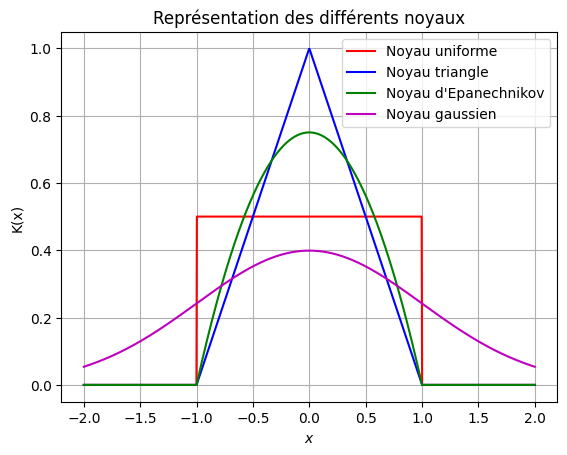

In [79]:
def AllplotK(pas, xmin, xmax, col1, col2, col3, col4):
    x = np.linspace(xmin, xmax, pas)
    plt.plot(x, K1(x), color=col1, label = 'Noyau uniforme')
    plt.plot(x, K2(x), color=col2, label = 'Noyau triangle')
    plt.plot(x, K3(x), color=col3, label = "Noyau d'Epanechnikov")
    plt.plot(x, K4(x), color=col4, label = 'Noyau gaussien')
    plt.title("Représentation des différents noyaux")
    plt.xlabel("$x$")
    plt.ylabel("K(x)")
    plt.legend()
    plt.grid()
    plt.show()
    return

#Test
AllplotK(1010, -2, 2, 'r', 'b', 'g', 'm')

**Question 3 -** Générer une réalisation de l’échantillon aléatoire $X$ selon la loi gaussienne standard de taille $n$. ($n$ est pour l’instant fixé à 100 dans le script).

In [86]:
n = 100 
X = np.random.normal(0, 1, n)

print(X)

[ 2.89190849 -0.38201407 -0.52034318 -0.21163659  0.57718532  0.5270295
 -1.19027697  0.43669963 -0.06977486 -0.32911206  0.01701919  0.16845536
 -0.06931181 -0.36851489 -0.28120128  1.06968066 -1.18051954 -2.54364474
  1.06437374  0.56950371 -0.88465348 -0.07211248  0.19737222 -0.12775907
 -0.5998628   0.34352155 -0.85288193  1.2188292  -1.40916965 -0.3765704
  1.19714321 -1.12246514  1.67352911  0.4789306  -0.56748939 -0.41558947
 -0.06412952  0.63059127  1.21446775  0.10296783  0.99553992  0.24265607
  0.76717369  0.62348958  1.54544064  0.25758967  1.11726777  0.80824162
  0.41646106 -0.85387428  0.22268796  1.89218412 -0.09606778  1.32028833
 -1.5630335  -0.27659621  0.08646738  1.75804149  0.24934296 -0.08214349
  0.03673438  0.12039232 -0.05833431 -0.32514042  0.75936795  2.26888941
  0.46772295  0.10275104 -1.42768874  2.11361431  0.16827028  0.51206398
 -0.47866807 -0.79785657 -1.46433253  1.15534217  0.94691955 -0.52471389
  0.91726729  0.31234546  0.87303278 -0.17818556 -0.4

**Question 4 -** Définir la fonction **fchapeau** qui prend comme argument une fonction $K$ (le noyau), la fenêtre $h$ et la réalisation de l’échantillon $X$ et une variable $x$ et qui retourne l’image de $x$ par la fonction $\hat{f_h}$.

In [88]:
def fchapeau(funct, h, X, x): #l'estimation de la densite f (ici la gaussienne standard, pour une fenetre h, au point x pour le noyau funct)
    s = 0
    n =  len(X)
    for i in range(n):
        s += funct((x-X[i])/h)
    return s/(n*h)

**⋆ Question 5 -** Représenter sur un même graphique la fonction *f* de référence ainsi que les quatres fonctions $\hat{f_h}$ obtenues avec les noyaux K1, K2, K3, K4. Vous ajouterez une légende et des couleurs différentes à
toutes les courbes. On fixera pour cette question $h = 2$. Vous définierez une fonction comme dans la question 2 pour faire cette question. Cette fonction sera nommée **Allplotfchapeauh2.**

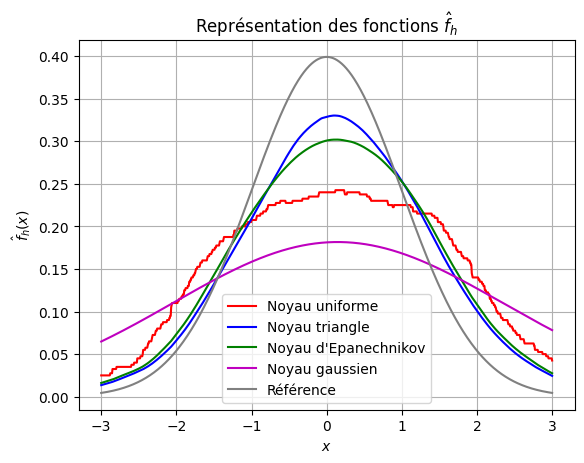

In [95]:
def reference(x):
    return norm.pdf(x, 0, 1)

def Allplotfchapeauh2(xmin, xmax, pas, col1, col2, col3, col4, colref):
    h = 2
    x = np.linspace(xmin, xmax, pas)
    plt.plot(x, fchapeau(K1, h, X, x), color=col1, label = 'Noyau uniforme')
    plt.plot(x, fchapeau(K2, h, X, x), color=col2, label = 'Noyau triangle')
    plt.plot(x, fchapeau(K3, h, X, x), color=col3, label = "Noyau d'Epanechnikov")
    plt.plot(x, fchapeau(K4, h, X, x), color=col4, label = 'Noyau gaussien')
    plt.plot(x, reference(x), color=colref, label = 'Référence')
    plt.title("Représentation des fonctions $\hat{f}_h$")
    plt.xlabel("$x$")
    plt.ylabel("$\hat{f}_h(x)$")
    plt.grid()
    plt.legend()
    plt.show()

Allplotfchapeauh2(-3, 3, 1000, 'r', 'b', 'g', 'm', 'gray')

**⋆ Question 6 -** Refaire la question précédente avec h = 1. Qualitativement, est-ce que l’estimation diffère plus lorsque l’on fait varier le noyau utilisé ou la fenêtre $h$ utilisée ? La nouvelle fonction pour cette question sera nommée **Allplotfchapeauh1.**

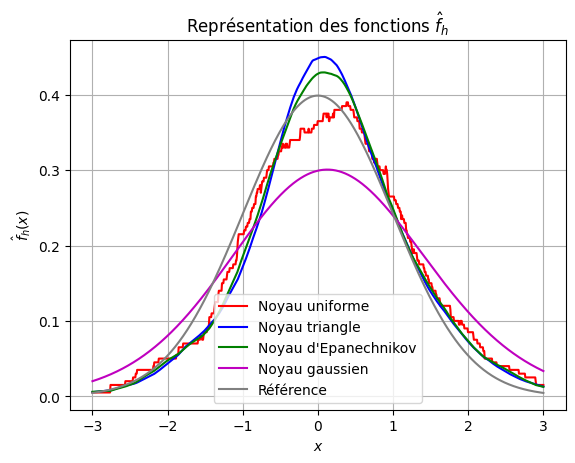

In [96]:
def Allplotfchapeauh1(xmin, xmax, pas, col1, col2, col3, col4, colref):
    h = 1
    x = np.linspace(xmin, xmax, pas)
    plt.plot(x, fchapeau(K1, h, X, x), color=col1, label = 'Noyau uniforme')
    plt.plot(x, fchapeau(K2, h, X, x), color=col2, label = 'Noyau triangle')
    plt.plot(x, fchapeau(K3, h, X, x), color=col3, label = "Noyau d'Epanechnikov")
    plt.plot(x, fchapeau(K4, h, X, x), color=col4, label = 'Noyau gaussien')
    plt.plot(x, reference(x), color=colref, label = 'Référence')
    plt.title("Représentation des fonctions $\hat{f}_h$")
    plt.xlabel("$x$")
    plt.ylabel("$\hat{f}_h(x)$")
    plt.grid()
    plt.legend()
    plt.show()

Allplotfchapeauh1(-3, 3, 1000, 'r', 'b', 'g', 'm', 'gray')

On constate que l'estimation diffère davantage lorsque l'on fait varier la fenêtre $h$.

**⋆ Question 7 -** Reprendre les deux questions précédentes pour $n = 10$ puis $n = 1000$. Pour cette question, quatre graphiques doivent être construits :
* Le premier pour $(n, h) = (10, 2), $
* Le second pour $(n, h) = (10, 1), $
* Le troisième pour $(n, h) = (1000, 2)$ 
* Le quatrième pour $(n, h) = (1000, 1).$ 

Vous détaillerez votre raisonnement dans le script et commenterez les résultats obtenus. Revenir ensuite à la valeur de $n = 100$ dans le script pour la suite du TP.

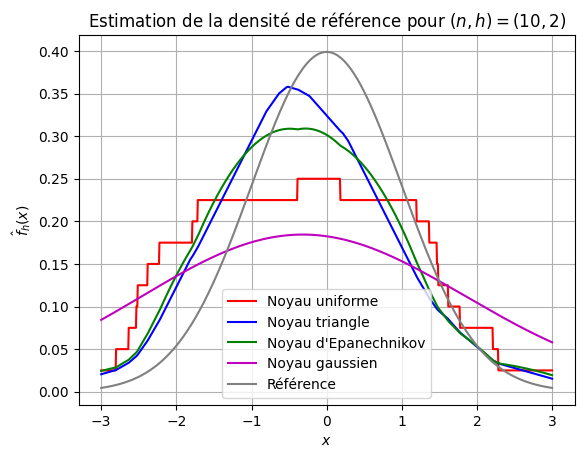

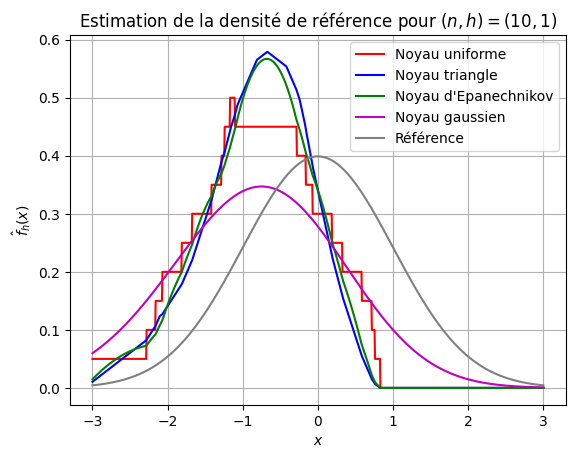

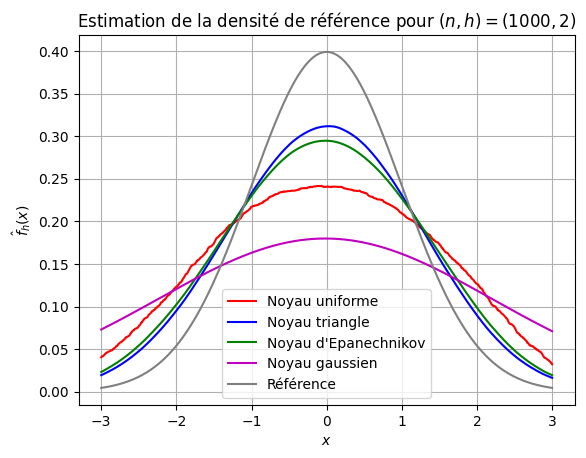

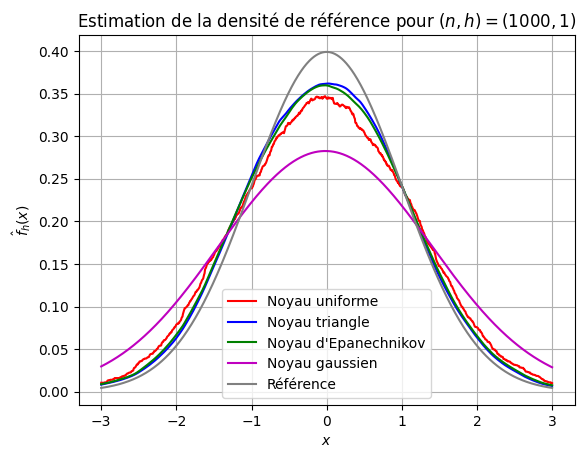

In [103]:
def Allplotfchapeau(xmin, xmax, pas, col1, col2, col3, col4, colref, n, h):
    X = np.random.normal(0, 1, n)
    x = np.linspace(xmin, xmax, pas)
    plt.plot(x, fchapeau(K1, h, X, x), color=col1, label = 'Noyau uniforme')
    plt.plot(x, fchapeau(K2, h, X, x), color=col2, label = 'Noyau triangle')
    plt.plot(x, fchapeau(K3, h, X, x), color=col3, label = "Noyau d'Epanechnikov")
    plt.plot(x, fchapeau(K4, h, X, x), color=col4, label = 'Noyau gaussien')
    plt.plot(x, reference(x), color=colref, label = 'Référence')
    plt.title("Estimation de la densité de référence pour $(n,h)=({},{})$".format(n,h))
    plt.xlabel("$x$")
    plt.ylabel("$\hat{f}_h(x)$")
    plt.grid()
    plt.legend()
    plt.show()

Allplotfchapeau(-3, 3, 1000, 'r', 'b', 'g', 'm', 'gray', 10, 2)
Allplotfchapeau(-3, 3, 1000, 'r', 'b', 'g', 'm', 'gray', 10, 1)
Allplotfchapeau(-3, 3, 1000, 'r', 'b', 'g', 'm', 'gray', 1000, 2)
Allplotfchapeau(-3, 3, 1000, 'r', 'b', 'g', 'm', 'gray', 1000, 1)

**Question 8 -** Nous allons calculer l’erreur quadratique d’une estimation : soit

$SCE(h) = \sum_{i=0}^{500} (\hat{f_h}(t_i)-f(t_i))^2$

la somme de carrés des écarts entre l’image de ti par l’estimation $\hat{f_h}$ et l’image de $t_i$ par $f$, où {$t_0, t_1, t_2, ... , t_{500}$} est une discrétisation de l’intervalle $[−5, 5]$ de pas $10/500$.
Autrement dit :

$−5 = t_0 < t_1 = −5 + \frac{10}{500} < t_2 = −5 + \frac{20}{500} < ··· < t_{500} = −5 + \frac{5000}{500} = 5$

Définir une fonction **SCE** qui prend comme paramètre une fonction (le noyau considéré), la fenêtre $h$, la densité de référence $f$ et qui retourne $SCE(h)$.

In [104]:
def SCE(funct, h, f):
    s = 0
    for i in range(501):
        ti = -5 + i*(10/500)
        s += (fchapeau(funct, h, X, ti) - f(ti))**2
    return s

Définir une fonction **lemeilleurh** qui prend une fonction (le noyau en question) et une autre fonction f (la référence) en paramètre et retourne l’index divisé par $100$ du minimum de la liste ${SCE(\frac{k}{100})}_{1≤k≤200}$. Pour chaque noyau, la meilleure fenêtre pour l’etimation de la fonction de
référence est donnée par cette fonction.

In [106]:
def lemeilleurh(funct, f):
    min = SCE(funct, 1/100, f)
    for k in range(2,201):
         val = SCE(funct, k/100, f)
         if min >= val:
              min = val
              h = k
    return h    

**⋆ Question 10 -** Définir alors une fonction qui représente graphiquement les quatres estimations de densité pour ces quatre noyaux avec les fenêtres obtenues via la fonction **lemeilleurh.** Définir pour ce faire, la fonction
**Allplotfchapeauhoptimal**.

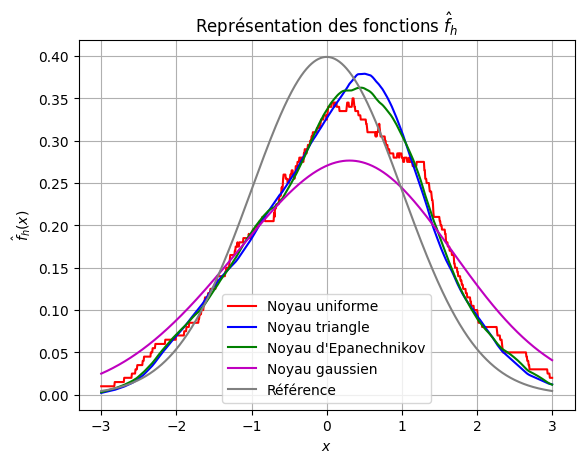

In [119]:
def Allplotfchapeauhoptimal(xmin, xmax, pas, col1, col2, col3, col4, colref):
    hu = lemeilleurh(K1, reference) #fenetre uniforme optimale
    ht = lemeilleurh(K2, reference) #fenetre triangle optimale
    he = lemeilleurh(K3, reference) #fenetre d'Epanechnikov optimale
    hg = lemeilleurh(K4, reference) #fenetre gaussienne optimale
    x = np.linspace(xmin, xmax, pas)
    plt.plot(x, fchapeau(K1, hu, X, x), color=col1, label = 'Noyau uniforme')
    plt.plot(x, fchapeau(K2, ht, X, x), color=col2, label = 'Noyau triangle')
    plt.plot(x, fchapeau(K3, he, X, x), color=col3, label = "Noyau d'Epanechnikov")
    plt.plot(x, fchapeau(K4, hg, X, x), color=col4, label = 'Noyau gaussien')
    plt.plot(x, reference(x), color=colref, label = 'Référence')
    plt.title("Représentation des fonctions $\hat{f}_h$ avec le $h$ optimal")
    plt.xlabel("$x$")
    plt.ylabel("$\hat{f}_h(x)$")
    plt.grid()
    plt.legend()
    plt.show()


Allplotfchapeauh1(-3, 3, 1000, 'r', 'b', 'g', 'm', 'gray')

Nous constatons qu'avec la valeur de fenêtrage optimal, nous obtenons des estimations de densité de référence plus proches de la fonction de référence. 

## Travail en séance Python : Partie 2

Nous allons maintenant exploiter les fonctionnalités de **scikit-learn.** La fonction **estimationdensite** présente dans le script sert à effectuer une estimation de densité par noyau gaussien (kernel='gaussian') avec pour fenêtre $h$ dont la densité de référence est un mélange gaussien (de deux gausiennes de moyennes mu1, mu2 et d’écart-types sigma1, sigma2). Cette fonction fait appel au package scikit-learn.

In [3]:
def estimationdensite(N,h,mu1,sigma1,mu2,sigma2):
        # générer l'échantillon à partir de deux lois normales
        X = np.concatenate((np.random.normal(mu1, sigma1, int(0.3 * N)),
                            np.random.normal(mu2, sigma2, int(0.7 * N))))[:, np.newaxis]

        # préparer les points où on calculera la densité
        X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

        # préparation de l'affichage de la vraie densité, qui est celle à partir
        #  de laquelle les données ont été générées (voir plus haut)
        # la pondération des lois dans la somme est la pondération des lois
        #  dans l'échantillon généré (voir plus haut)
        true_density = (0.3 * norm(mu1,sigma1).pdf(X_plot[:,0]) + 0.7 * norm(mu2,sigma2).pdf(X_plot[:,0]))

        # estimation de densité par noyaux gaussiens
        kde = KernelDensity(kernel='gaussian', bandwidth=h).fit(X)   


        # calcul de la densité pour les données de X_plot
        density = np.exp(kde.score_samples(X_plot))

        # affichage : vraie densité et estimation
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.fill(X_plot[:,0], true_density, fc='b', alpha=0.2, label='Vraie densité')
        ax.plot(X_plot[:,0], density, '-', label="Estimation")
        ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')
        ax.legend(loc='upper left')
        plt.show()   

**⋆ Question 1-** Éxecuter cette fonction avec $mu1 = 0$, $mu2 = 5$ et $sigma1 = sigma2 = 1$, $N = 100$ et $h = 0,75$.

**Question 2 -** Comparer à tout autre paramètre fixés comme dans la question précédente, l’influence de la fenêtre $h$. On pourra tester des valeurs de $h$ comprises entre $0,2$ et $1,5$. Commenter.

**Question 3 -** Faites varier les paramètres des deux lois gaussiennes qui définissent le mélange gaussien. Commenter.

**Question 4-** Faites varier *N* et commenter.

**Question 5 -** ⋆ On peut aussi tester d’autres noyaux par exemple en remplaçant 'gaussian' dans le code par 'epanechnikov'. Réaliser ce graphique en éxecutant la fonction **estimationdensite2** avec les mêmes paramètres que ceux de la question 1.

In [4]:
def estimationdensite2(N,h,mu1,sigma1,mu2,sigma2):
        # générer l'échantillon à partir de deux lois normales
        X = np.concatenate((np.random.normal(mu1, sigma1, int(0.3 * N)),
                            np.random.normal(mu2, sigma2, int(0.7 * N))))[:, np.newaxis]

        # préparer les points où on calculera la densité
        X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

        # préparation de l'affichage de la vraie densité, qui est celle à partir
        #  de laquelle les données ont été générées (voir plus haut)
        # la pondération des lois dans la somme est la pondération des lois
        #  dans l'échantillon généré (voir plus haut)
        true_density = (0.3 * norm(mu1,sigma1).pdf(X_plot[:,0]) + 0.7 * norm(mu2,sigma2).pdf(X_plot[:,0]))

        # estimation de densité par noyaux d'epanechnikov
        kde = KernelDensity(kernel='epanechnikov', bandwidth=h).fit(X)   


        # calcul de la densité pour les données de X_plot
        density = np.exp(kde.score_samples(X_plot))

        # affichage : vraie densité et estimation
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.fill(X_plot[:,0], true_density, fc='b', alpha=0.2, label='Vraie densité')
        ax.plot(X_plot[:,0], density, '-', label="Estimation")
        ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')
        ax.legend(loc='upper left')
        plt.show()      